In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import seaborn as sns
from scipy import stats
import datetime
sns.set()

In [52]:
def makeTimestamp(x):
    return x.timestamp()

In [17]:
# Load in the counties 
can = pd.read_csv('Airport-Data/can.csv')
atlCounties = pd.read_csv('Airport-Data/atl.csv')
jfkCounties = pd.read_csv('Airport-Data/jfk.csv')
lgaCounties = pd.read_csv('Airport-Data/lga.csv')
seaCounties = pd.read_csv('Airport-Data/sea.csv')
laxCounties = pd.read_csv('Airport-Data/lax.csv')

# Load in original airport data
airports = pd.read_csv('Archieved-Data/airport_traffic_NA.csv')

In [38]:
# Associate Canadian provinces with its respective airport records
listCanAirports = can["airport"].unique()
canAirports = airports[airports["AirportName"].isin(listCanAirports)]
canAirports = canAirports.sort_values(by = ['AirportName', 'Date'])

yvr = canAirports[canAirports["AirportName"] == "Vancouver International"].reset_index(drop = True)
yeg = canAirports[canAirports["AirportName"] == "Calgary International"].reset_index(drop = True)
yyz = canAirports[canAirports["AirportName"] == "Toronto Pearson"].reset_index(drop = True)
yul = canAirports[canAirports["AirportName"] == "Montreal Trudeau"].reset_index(drop = True)

#Repeat with the USA 
atl = airports[airports["State"] == "Georgia"]
atl = atl.sort_values(by = ['Date']).reset_index(drop = True)

jfk = airports[airports["AirportName"] == "John F. Kennedy International"]
jfk = jfk.sort_values(by = ['Date']).reset_index(drop = True)

lga = airports[airports["AirportName"] == "LaGuardia"]
lga = lga.sort_values(by = ['Date']).reset_index(drop = True)

sea = airports[airports["AirportName"] == "Seattle-Tacoma International"]
sea = sea.sort_values(by = ['Date']).reset_index(drop = True)

lax = airports[airports["AirportName"] == "Los Angeles International"]
lax = lax.sort_values(by = ['Date']).reset_index(drop = True)

# YVR

In [54]:
yvr["timestamp"] = yvr["Date"].apply(makeTimestamp)
fit = stats.linregress(yvr["timestamp"], yvr["PercentOfBaseline"])
yvr["Prediction"] = yvr["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(3.6382585769391565e-07, -503.84210551536455)

Text(0.5, 0, '')

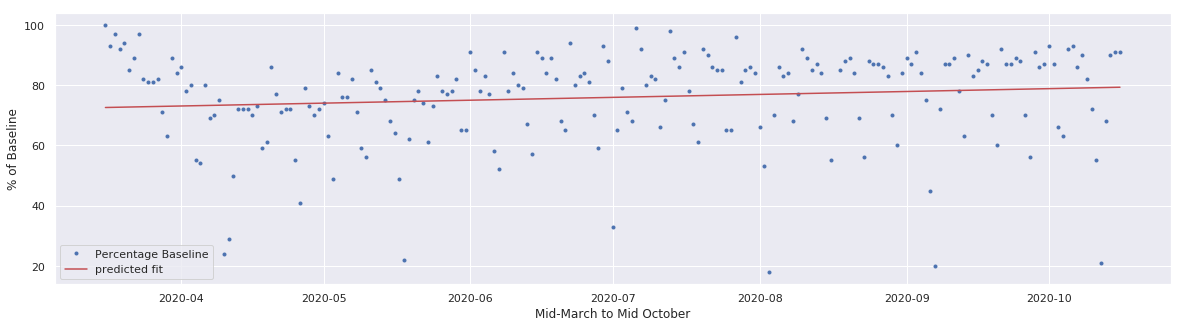

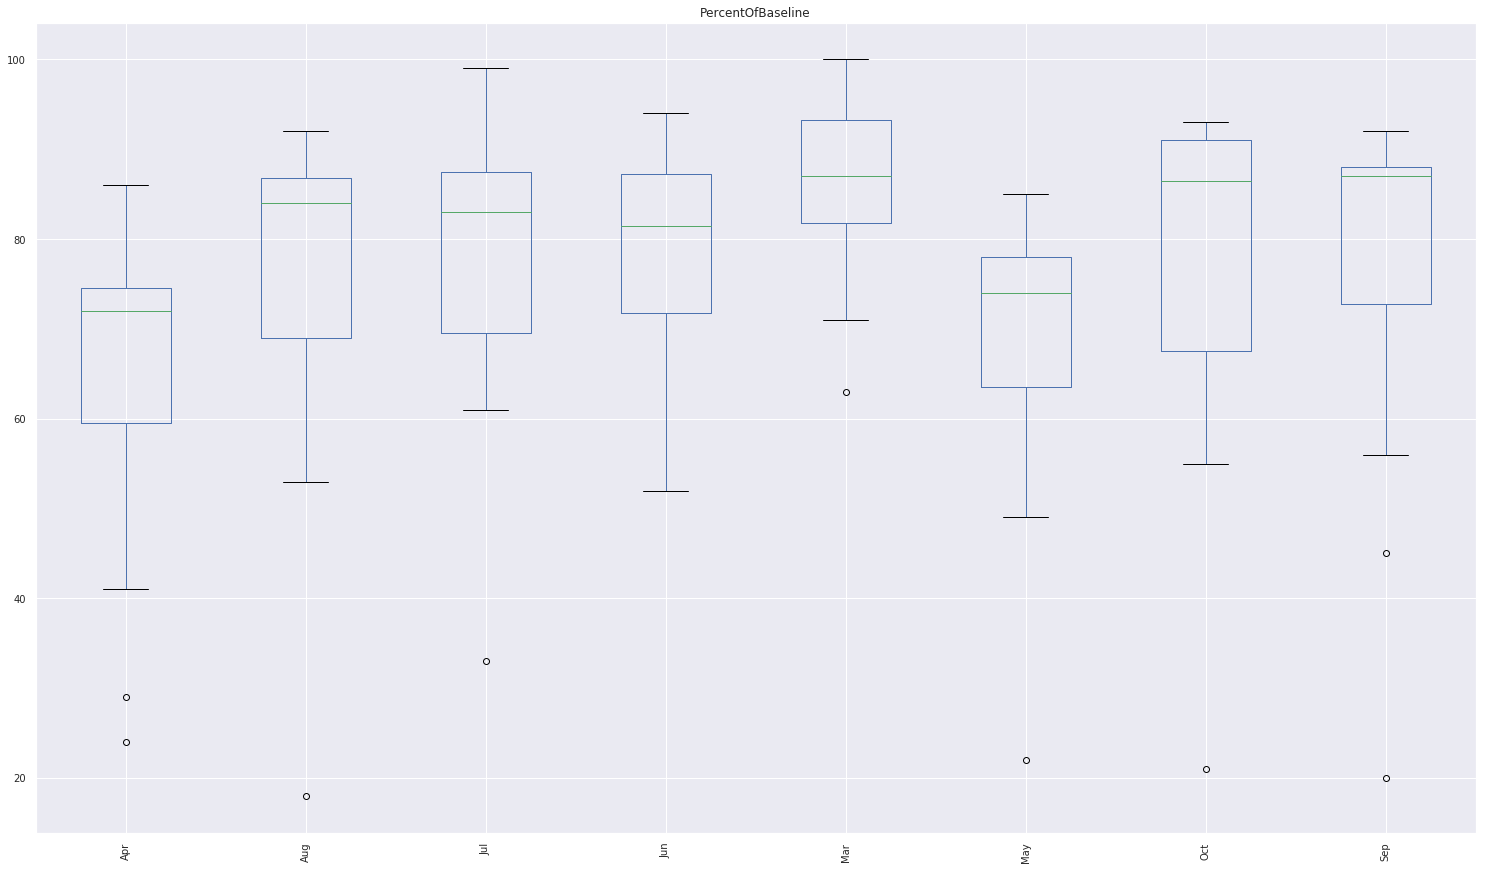

In [58]:
plt.figure(figsize = (20,5))
plt.plot(yvr["Date"], yvr['PercentOfBaseline'], 'b.', label = 'Percentage Baseline')
plt.plot(yvr["Date"], yvr["Prediction"], 'r-', label = 'predicted fit')
plt.xlabel("Mid-March to Mid October")
plt.ylabel("% of Baseline")
plt.legend()

yvr["Date"] = pd.to_datetime(yvr["Date"])
yvr.boxplot(column = ['PercentOfBaseline'], by = yvr['Date'].dt.strftime('%b'), rot = 90, fontsize = 10, figsize = (25,15))
plt.suptitle("")
plt.xlabel("")